# Julia: a fresh approach to technical computing


* Julia is a high-level programming language for technical computing which allows you to manipulate and analyse large data sets
* Other programming languages similar to Julia are Matlab and Python
* Unlike Python, Julia is build from the ground for techical computing
* Unlike Matlab, julia is free and open-source software
* Julia is fast (http://julialang.org/benchmarks/: these are microbenchmark (with explicit loops) to be taken with a grain of salt, and see also benchmarks below)


## Try Julia

* Try julia online at https://juliabox.com/

## Install Julia

* Go to http://julialang.org/downloads/
* Install also a text editor with julia support (e.g. emacs with the julia mode)

### Optionally

* Install Jupyter http://jupyter.org/

# Variable declarations 

## Unicode

* Unicode in in variables names and function
* For example greek letters
* Typed as, e.g. \alpha followed by Tab (in text editor with Julia support)

In [1]:
α = π/2
σ² = 4

4

* Also for function names

In [2]:
function my_serious_function😼(x,y)
    return y,x
end

my_serious_function😼 (generic function with 1 method)

In [3]:
my_serious_function😼(1,2)

(2, 1)

* also for build-in operators

In [4]:
2 ∈ Set([2,3])

true

In [5]:
2 in Set([2,3])

true

* Do not get crazy

In [6]:
𝔳𝔞𝔯𝔦𝔞𝔟𝔩𝔢 = 1.234
שคгเค๒ɭє = 2.345

2.345

# Functions

* Functions are central in julia:
  * functions are "first-class" (e.g. a variable/parameter can hold a function)
  * all operators are defined as functions: `1+2` is in fact `+(1,2)`
  * functions are very flexible due to [multiple dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch)
* There are 3 ways to define a function:

In [7]:
function times_two(x)
    return 2x
end

times_two (generic function with 1 method)

* `return` is actually optional. If it is not present, then the last value of a function is returned.

In [8]:
times2(x) = 2x

times2 (generic function with 1 method)

In [9]:
x -> 2x

(::#1) (generic function with 1 method)

# Operators

* Julia has all the usual operators: +, -, *, / as most programming languages have

## Additional interesting operators

* Multiply by the inverse of a matrix: A \ x

In [10]:
x = [1; 1]; A = [2 0; 0 2]; A \ x

2-element Array{Float64,1}:
 0.5
 0.5

* do you like shell pipes? (in DIVA 1081 shell pipes for 154 scripts)

In [11]:
[1:5;]  |> x->x.^2 |> x-> x[x .> 2] |> sum

54

* function composition f ∘ g (x) (type \circ followed by the tab key), in julia 0.6

In [12]:
abs ∘ sin(1)

(::#55) (generic function with 1 method)

# Arrays

* Arrays can be homogenous or heterogenous
* Julia figures this out for you

* Homogenous arrays:

In [13]:
arr = [1,2,3,4]

4-element Array{Int64,1}:
 1
 2
 3
 4

Elements can also be converted if necessary to make an homogenous array

In [14]:
arr2 = [2.,4.,5]

3-element Array{Float64,1}:
 2.0
 4.0
 5.0

Example of an heterogeneous array

In [15]:
arr = [1,2,"this is a string"]

3-element Array{Any,1}:
 1                  
 2                  
  "this is a string"

## Automatic type inference

In [16]:
function speed(u,v)
    u2 = u.^2
    v2 = v.^2
    s2 = u2 + v2
    s = sqrt.(s2)
    return s
end

speed (generic function with 1 method)

In [17]:
@code_warntype speed(1.,2.)

Variables:
  #self#::#speed
  u::Float64
  v::Float64
  #11::##11#13
  #12::##12#14
  u2::Float64
  v2::Float64
  s2::Float64
  s::Float64

Body:
  begin 
      $(Expr(:inbounds, false))
      # meta: location broadcast.jl broadcast 16
      SSAValue(2) = u::Float64
      # meta: pop location
      $(Expr(:inbounds, :pop))
      u2::Float64 = (Base.mul_float)(SSAValue(2), SSAValue(2))::Float64 # line 3:
      $(Expr(:inbounds, false))
      # meta: location broadcast.jl broadcast 16
      SSAValue(3) = v::Float64
      # meta: pop location
      $(Expr(:inbounds, :pop))
      v2::Float64 = (Base.mul_float)(SSAValue(3), SSAValue(3))::Float64 # line 4:
      s2::Float64 = (Base.add_float)(u2::Float64, v2::Float64)::Float64 # line 5:
      s::Float64 = (Base.Math.sqrt_llvm)(s2::Float64)::Float64 # line 6:
      return s::Float64
  end::Float64


In [18]:
speed([1.,2.],[2.,3.])

2-element Array{Float64,1}:
 2.23607
 3.60555

In [19]:
@code_warntype speed([1.,2.],[2.,3.])

Variables:
  #self#::#speed
  u::Array{Float64,1}
  v::Array{Float64,1}
  #11::##11#13
  #12::##12#14
  u2::Any
  v2::Any
  s2::Array{Float64,1}
  s::Any
  T@_10::Any
  shape@_11::Tuple{Base.OneTo{Int64}}
  iter@_12::CartesianRange{CartesianIndex{1}}
  C@_13::Array{Float64,1}
  keeps@_14::Tuple{Tuple{Bool}}
  Idefaults@_15::Tuple{Tuple{Int64}}
  #temp#@_16::Int64
  keeps@_17::Tuple{}
  Idefaults@_18::Tuple{}
  #temp#@_19::Int64
  keep@_20::Tuple{Bool}
  Idefault@_21::Tuple{Int64}
  #temp#@_22::Int64
  ind1@_23::Base.OneTo{Int64}
  keep@_24::Tuple{}
  Idefault@_25::Tuple{}
  #temp#@_26::Int64
  I_1@_27::CartesianIndex{1}
  val_1@_28::Float64
  result@_29::Float64
  I@_30::CartesianIndex{1}
  i#672::Int64
  I@_32::CartesianIndex{1}
  n#671::Int64
  i#670::CartesianIndex{0}
  #temp#@_35::Bool
  r#669::CartesianRange{CartesianIndex{1}}
  A_1@_37::Any
  keep_1@_38::Tuple{Bool}
  Idefault_1@_39::Tuple{Int64}
  #temp#@_40::Any
  T@_41::Any
  shape@_42::Tuple{Base.OneTo{Int64}}
  iter@_43::Car

      s2::Array{Float64,1} = $(Expr(:invoke, MethodInstance for +(::Array{Float64,1}, ::Array{Float64,1}), :(Main.+), :(C@_13), :(C@_44))) # line 5:
      $(Expr(:inbounds, false))
      # meta: location broadcast.jl broadcast 434
      # meta: location broadcast.jl broadcast_c 311
      # meta: location broadcast.jl broadcast_indices 48
      # meta: location broadcast.jl broadcast_indices 52
      # meta: location abstractarray.jl indices 64
      SSAValue(110) = (Base.arraysize)(s2::Array{Float64,1}, 1)::Int64
      # meta: pop location
      # meta: pop location
      # meta: pop location
      SSAValue(156) = (Base.select_value)((Base.slt_int)(SSAValue(110), 0)::Bool, 0, SSAValue(110))::Int64 # line 314:
      # meta: location broadcast.jl broadcast_t 266
      C@_75::Array{Float64,1} = $(Expr(:foreigncall, :(:jl_alloc_array_1d), Array{Float64,1}, svec(Any, Int64), Array{Float64,1}, 0, SSAValue(156), 0)) # line 267:
      # meta: location broadcast.jl map_newindexer 125 # line 126

# Code generation

* The julia compiler generates efficient machine code
* Loops are not slow (compared to Python, Matlab or Octave)
* It is still possible to use vectorized code
  * vectorized code typically uses more memory than code with explicit loops
  * vectorized code is slightly slower than code with with explicit loops
 

In [20]:
@code_llvm speed(1.,2.)


define double @julia_speed_61401(double, double) #0 !dbg !5 {
pass:
  %2 = fmul double %0, %0
  %3 = fmul double %1, %1
  %4 = fadd double %2, %3
  %5 = call double @llvm.sqrt.f64(double %4)
  ret double %5
}


In [21]:
@code_native speed(1.,2.)

	.text
Filename: In[16]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 2
	mulsd	%xmm0, %xmm0
Source line: 3
	mulsd	%xmm1, %xmm1
Source line: 4
	addsd	%xmm0, %xmm1
Source line: 5
	xorps	%xmm0, %xmm0
	sqrtsd	%xmm1, %xmm0
Source line: 6
	popq	%rbp
	retq
	nopl	(%rax)


## Benchmarks


### Mandelbrod fractals

* Median times of 30 runs

|                  |      style | run time (sec)  |
|------------------|------------|----------------:|
| matlab R2013a    |       loops|   5.67     |
| matlab R2013a    |  vectorized|   2.40  |
|  octave 3.8.1    |       loops| 184.56  |
|  octave 3.8.1    |  vectorized|   4.72  |
|     julia 0.5    |       loops|   0.19 |
|     julia 0.5    |  vectorized|   2.24  |

### Ensemble Transform Kalman Filter (ETKF)

#### Parameters

| parameter                               | value  |
|-----------------------------------------|--------|
| number of elements in the state vector  | 50     |
| ensemble size                           | 100    |
| number of observations                  | 5      |
| number of water columns                 | 10000  |

#### Run-time

| Language | version | comments | run-time (s) |
|----------|---------|----------|--------------|
| Julia    | 0.4.5   |          | 43.362 |
| Fortran (gfortran)  | 4.8.4   | intrinsic matmul             |  136.481 |
| Fortran (gfortran) | 4.8.4   | matmul calls external BLAS    |  32.483  |
| Matlab   | R2013a  |          | 31.1854      |
| Octave   | 3.8.1   |          | 58.019       |




| Language | version | comments | run-time (s) |
|----------|---------|----------|--------------|
| Fortran (gfortran) | 4.8.4   | matmul calls external BLAS    |  32.483  |
| Julia    | 0.5.0   | type-stable, without bounds check         | 29.948924 |


# Working with files
* open a file, and load every line sequentially

In [22]:
f = open("file.txt")
for l in eachline(f)
         println(l)
end
close(f)


this
is
a test


* a common error is to forget to close the file
* with a do-block

In [23]:
open("file.txt") do f
  for l in eachline(f)
     println(l)
  end
end

this
is
a test


* similar to python's `with` statement

# Visualization

* Julia can call all Python modules, for instance also matplotlib
* `PyPlot` is a matplotlib wrapper

In [24]:
using PyPlot

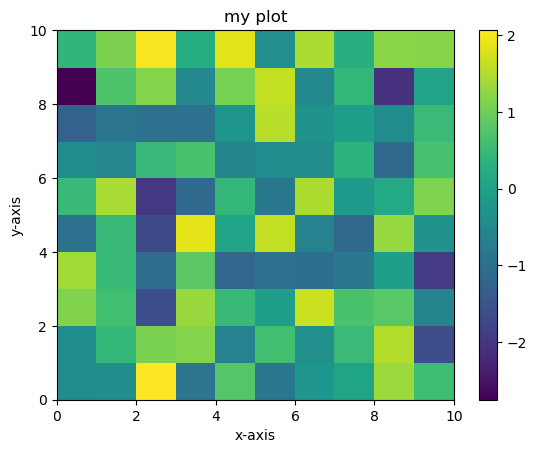

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff1eb9a71d0>

In [25]:
x = randn(10,10)
pcolor(x)
xlabel("x-axis")
ylabel("y-axis")
title("my plot")
colorbar()

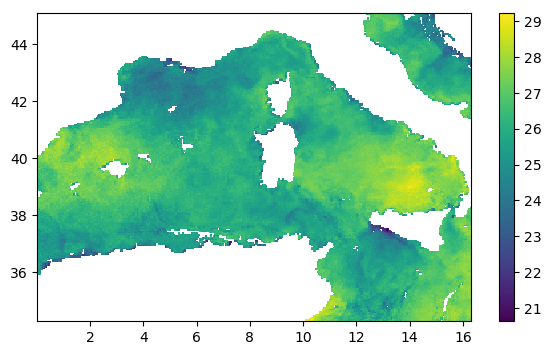

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff1dffeb7d0>

In [26]:
using NetCDF
using PyCall
figure(figsize=(7,4))
@pyimport numpy.ma as ma
fname = "/home/abarth/Lectures/MatlabOctaveTutorial/data/WesternMedSST.nc"
lon = ncread(fname,"lon"); lat = ncread(fname,"lat");
SST = ncread(fname,"seviri_sst");
fillval = ncgetatt(fname,"seviri_sst","_FillValue")
pyma(X) = pycall(ma.array, Any, X, mask=X .== fillval)
pcolor(lon,lat,pyma(SST[:,:,1]')); colorbar()

# Custom types

In [27]:
using PyPlot
using Base

* Create a new type `ParamCovar` which represents an error covariance matrix
* It behaves like an Array of 2 dimensions

In [28]:
type ParamCovar{T} <: AbstractArray{T, 2}
    n:: Int64       # dimension
    len:: T         # correlation length
    var:: T         # variance
    x:: Array{T,2}  # x[i,:] are the n coordinates of the i-th grid point
end

function Base.size{T}(PC::ParamCovar{T})
    return (PC.n,PC.n)
end

function Base.getindex{T}(PC::ParamCovar{T},i,j)
    d2 = sum((PC.x[i,:] - PC.x[j,:]).^2)
    return PC.var * exp(-d2 / (PC.len^2))
end

* Define a domain [-10,10] x [-10,10]

In [29]:
imax = 50
jmax = imax

vx1 = linspace(-10,10,imax)
vx2 = linspace(-10,10,jmax)

x1 = [x1 for x1 in vx1, x2 in vx2];
x2 = [x2 for x1 in vx1, x2 in vx2];

* create an instance of the `ParamCovar` type

In [30]:
n = length(x1)
m = 3

# n: number of grid points (total)
# len = 4 (correlation length)
# var = 1 (background variance)

# Pf = ParamCovar{Float64}(n,4.,1.,[x1[:] x2[:]]) or just
Pf = ParamCovar(n,4.,1.,[x1[:] x2[:]]);

* setup additional matrices (observation operator $\mathbf H$, observation error covariance matrix $\mathbf R$, forecast $\mathbf x_f$)

In [31]:
# index of the middle of the domain
ind = sub2ind(size(x1),Int64(imax/2),Int64(jmax/2))

H = sparse([1,2,3],
           [1,ind,n], [1.,1.,1.], 3,n)

R = Diagonal([1,1,1])
yo = [1,-1,1]


xf = zeros(n);

* optimal interpolation

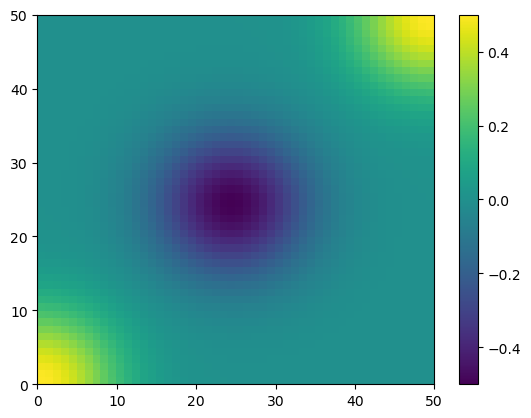

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff1ddda0fd0>

In [32]:
xa = xf + Pf * (H' * ((H*Pf*H' + R) \ (yo - H*xf)))

xa = reshape(xa,size(x1))
pcolor(xa)
colorbar()


# Parallel programming

* start julia with
  * `-p`: local machine
  * `--machinefile`:  cluster
* or use, e.g. `addprocs(4)` to use 4 workers


## Lower-level constructs

In [33]:
addprocs(4)

# process ID
@show myid()

# number of all process
@show nprocs()

# id of all workers
@show workers()

# run myid() on process 4
@show fetch(@spawnat 4 myid())

myid() = 1
nprocs() = 5
workers() = [2, 3, 4, 5]
fetch(@spawnat(4, myid())) = 4


4

In [34]:
@everywhere heavy_computation(x) =  x.^5;
r = @spawn heavy_computation(2)
fetch(r)

r = @spawnat 2 heavy_computation(2)
fetch(r)

32

## Distributed arrays

In [35]:
@everywhere using DistributedArrays

y = distribute([1:10;])


# get data from worker 2-5
@show fetch(@spawnat 2 localpart(y))


function some_complex_work(y::DArray)
    return DArray(size(y),procs(y)) do I
        @show I[1]        
        return localpart(y).^2
    end
end

res = some_complex_work(y)
@show res

fetch(@spawnat(2, localpart(y))) = [1, 2, 3]
	From worker 2:	I[1] = 1:3
	From worker 4:	I[1] = 6:7
	From worker 5:	I[1] = 8:10
	From worker 3:	I[1] = 4:5
res = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


10-element DistributedArrays.DArray{Int64,1,Array{Int64,1}}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

* work with two distributed arrays

In [36]:
function some_complex_work2(y::DArray, z::DArray)
    return DArray(size(y),procs(y)) do I
        @show I
        localpart(y).^2 + localpart(z).^2
    end
end

z = distribute(2*[1:10;])

res = some_complex_work2(y,z)
@show res

	From worker 5:	I = (8:10,)
	From worker 2:	I = (1:3,)
	From worker 4:	I = (6:7,)
	From worker 3:	I = (4:5,)
res = [5, 20, 45, 80, 125, 180, 245, 320, 405, 500]


10-element DistributedArrays.DArray{Int64,1,Array{Int64,1}}:
   5
  20
  45
  80
 125
 180
 245
 320
 405
 500

In [37]:
function smoothing(y::DArray)
    return DArray(size(y),procs(y)) do I
        tmp = zeros(length(I[1])); 
        for i = I[1]
            if i > 1 && i < length(y)
                tmp[i - first(I[1]) + 1] = 0.1 * y[i-1] + 0.8 * y[i] + 0.1 * y[i+1]
            else
                tmp[i - first(I[1]) + 1] = y[i]
            end
        end
        return tmp
    end    
end

x = drandn(10)

10-element DistributedArrays.DArray{Float64,1,Array{Float64,1}}:
 -1.81026 
  0.599959
  1.30239 
 -0.740632
  1.06159 
 -0.391973
 -0.651016
  0.638526
  0.657718
  0.368162

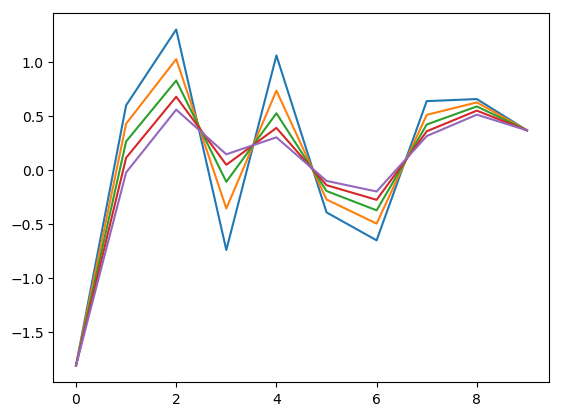

In [38]:
plot(x); 
xs = smoothing(x); plot(xs);
xs = smoothing(xs); plot(xs);
xs = smoothing(xs); plot(xs);
xs = smoothing(xs); plot(xs);


# Julia with SLURM (e.g. nic4,...)

* Use the package [ClusterManager](https://github.com/JuliaParallel/ClusterManagers.jl) for parallel processing
* Do not use the option `--machinefile` as it bypasses SLURM.
* A full example would be (`submit_julia.sh`):

```bash
#!/bin/bash
#SBATCH --job-name=julia
#SBATCH --output=output-%N-%j.out
#SBATCH --cpus-per-task=1

export script="$1"
echo Julia script $script

bt0=$(date +%s)

julia <<EOF
using ClusterManagers
addprocs(SlurmManager($SLURM_NTASKS))

# Test the connection
hosts = []
for i in workers()
    host, pid = fetch(@spawnat i (gethostname(), getpid()))
    push!(hosts, host)
end

@show hosts

# Run the script
include("$script")

# The Slurm resource allocation is released when all the workers have
# exited
for i in workers()
    rmprocs(i)
end
EOF

bt1=$(date +%s)

awk  " BEGIN { print \"Run time (hours): \",($bt1 - $bt0)/3600 } "
```

* The script can be used as:

```bash
sbatch --ntasks=2 --time=20:00:00 --mem-per-cpu=3000 --job-name=myjob submit_julia.sh /path/to/julia/script.jl
```

## Other nice features of Julia

* good document of the Julia language: http://docs.julialang.org/en/stable/
* find documentation from the julia REPL

In [39]:
apropos("Pearson")

Base.cor


In [40]:
?cor

search: cor Core xcorr acorr VecOrMat Vector vecnorm factorize factorial



```
cor(x)
```

Return the number one.

```
cor(X[, vardim=1])
```

Compute the Pearson correlation matrix of the matrix `X` along the dimension `vardim`.

```
cor(x, y)
```

Compute the Pearson correlation between the vectors `x` and `y`.

```
cor(X, Y[, vardim=1])
```

Compute the Pearson correlation between the vectors or matrices `X` and `Y` along the dimension `vardim`.


* get all field names of a type (introspection)

In [41]:
S = speye(2);
fieldnames(S)

5-element Array{Symbol,1}:
 :m     
 :n     
 :colptr
 :rowval
 :nzval 

* Most of julia (the programming environement) is written in julia (the language). It is easy to find out where functions or operators are defined:

In [42]:
@which speye(2)

speye(n::Integer) in Base.SparseArrays at sparse/sparsematrix.jl:1385

* List all functions with a given name (but operating on a different type)

In [43]:
methods(diag)

# 17 methods for generic function "diag":
diag(B::BitArray{2}) in Base.LinAlg at linalg/bitarray.jl:81
diag(M::SymTridiagonal{T}) where T in Base.LinAlg at linalg/tridiag.jl:116
diag(M::SymTridiagonal{T}, n::Integer) where T in Base.LinAlg at linalg/tridiag.jl:116
diag(M::Tridiagonal{T}) where T in Base.LinAlg at linalg/tridiag.jl:533
diag(M::Tridiagonal{T}, n::Integer) where T in Base.LinAlg at linalg/tridiag.jl:533
diag(A::LowerTriangular) in Base.LinAlg at linalg/triangular.jl:303
diag(A::Base.LinAlg.UnitLowerTriangular) in Base.LinAlg at linalg/triangular.jl:304
diag(A::UpperTriangular) in Base.LinAlg at linalg/triangular.jl:305
diag(A::Base.LinAlg.UnitUpperTriangular) in Base.LinAlg at linalg/triangular.jl:306
diag(D::Diagonal) in Base.LinAlg at linalg/diagonal.jl:280
diag(M::Bidiagonal{T}) where T in Base.LinAlg at linalg/bidiag.jl:316
diag(M::Bidiagonal{T}, n::Integer) where T in Base.LinAlg at linalg/bidiag.jl:316
diag(A::SparseMatrixCSC{Tv,Ti} where Ti<:Integer) where Tv in Base.SparseArrays at sparse/sparsematrix.jl:3269
diag(A::AbstractArray{T,1} where T) in Base.LinAlg at linalg/generic.jl:305
diag(A::AbstractArray{T,2} where T) in Base.LinAlg at linalg/dense.jl:250
diag(A::AbstractArray{T,2} where T, k::Integer) in Base.LinAlg at linalg/dense.jl:250
diag(F::Base.SparseArrays.CHOLMOD.Factor{Tv}) where Tv in Base.SparseArrays.CHOLMOD at sparse/cholmod.jl:1631

* integrated package manager

```julia
Pkg.add("DataAssim")
```

* Have a look at: http://pkg.julialang.org/

* Easy to write documentation in markdown
* Support for jupyter
* Easy to use with github, travis-ci, codecov.io
* Support of macros (function that can transform your code)
* Numerous constructs to avoid copying data
  * pass argument by reference instead of by value
  * `reshape` gives a different view on the data
  * `SubArray` ` 


In [44]:
A = [1 2 3; 4 5 6];
@show A
b = view(A,:,1)
@show b
b[1] = 100
@show A

A = [1 2 3; 4 5 6]
b = [1, 4]
A = [100 2 3; 4 5 6]


2×3 Array{Int64,2}:
 100  2  3
   4  5  6

* list comprehension

In [45]:
A = [sin(π * x) for x = 0:0.2:1]

6-element Array{Float64,1}:
 0.0        
 0.587785   
 0.951057   
 0.951057   
 0.587785   
 1.22465e-16

In [46]:
A = [sin(π * x) * sin(π * y) for x = 0:0.2:1, y = 0:0.2:1]

6×6 Array{Float64,2}:
 0.0  0.0          0.0          0.0          0.0          0.0        
 0.0  0.345492     0.559017     0.559017     0.345492     7.19829e-17
 0.0  0.559017     0.904508     0.904508     0.559017     1.16471e-16
 0.0  0.559017     0.904508     0.904508     0.559017     1.16471e-16
 0.0  0.345492     0.559017     0.559017     0.345492     7.19829e-17
 0.0  7.19829e-17  1.16471e-16  1.16471e-16  7.19829e-17  1.49976e-32

* do you like shell pipes? (in DIVA 1081 shell pipes for 154 scripts)

In [47]:
[1:5;]  |> x->x.^2 |> x-> x[x .> 2] |> sum

54

* Support for GPU programming
   * package ArrayFire
   * Native support for GPU programming is in developpement
* Version 0.6 is [planned](https://discourse.julialang.org/t/0-6-release-timeline/836) for end of February 
* Interesting read: [A Journey Through Julia: A dynamic and fast language](http://hdl.handle.net/2268/203491) from Thibaut Cuvelier

# Caveats

* Plotting data with missing values is/was not as straight-foreward as in Matlab/Octave. Now PyPlot ignored NaNs as in Matlab/Octave
* It takes some time to compile/recompile modules  (which can be a bit annoying in interactive use)
* Still a young language
